In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('covid-data.csv')

In [3]:
df_original.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131500 entries, 0 to 131499
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 131500 non-null  object 
 1   continent                                123091 non-null  object 
 2   location                                 131500 non-null  object 
 3   date                                     131500 non-null  object 
 4   total_cases                              124375 non-null  float64
 5   new_cases                                124373 non-null  float64
 6   new_cases_smoothed                       123330 non-null  float64
 7   total_deaths                             113298 non-null  float64
 8   new_deaths                               113494 non-null  float64
 9   new_deaths_smoothed                      123330 non-null  float64
 10  total_cases_per_million         

In [5]:
df_original.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.243750e+05,124373.000000,123330.000000,1.132980e+05,113494.000000,123330.000000,123736.00000,123734.000000,122696.000000,112672.000000,...,88607.000000,87325.000000,57238.000000,103366.000000,122248.000000,113834.000000,4623.000000,4623.000000,4623.000000,4623.000000
mean,2.013939e+06,8338.897799,8359.638338,4.996560e+04,184.311972,168.840030,19375.14109,85.686714,85.575258,398.403924,...,10.591016,32.747459,50.870115,3.029954,73.259252,0.726248,31277.501168,8.584811,15.794497,769.119301
std,1.150869e+07,43516.048476,43023.843904,2.565859e+05,873.118464,819.030964,32256.71325,197.748216,167.062820,657.619025,...,10.503087,13.511373,31.822241,2.455970,7.533284,0.150048,88253.529156,15.911791,31.094783,1154.573476
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.00100,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1749.128494
25%,2.347000e+03,3.000000,10.286000,7.900000e+01,0.000000,0.143000,401.88400,0.335000,1.652000,11.723750,...,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000,-175.550000,-1.035000,-0.930000,-45.020446
50%,2.652900e+04,104.000000,129.714000,7.270000e+02,2.000000,2.000000,3102.23600,11.294000,15.808500,78.325000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,2159.200000,5.130000,6.380000,359.539172
75%,2.598825e+05,1073.000000,1128.821250,6.416000e+03,22.000000,18.571000,24380.29875,82.823750,92.410000,512.321500,...,19.300000,41.300000,83.241000,4.000000,78.740000,0.845000,19795.600000,13.505000,22.050000,1332.908083
max,2.495419e+08,907963.000000,826457.571000,5.044839e+06,18007.000000,14703.286000,235692.64300,8620.690000,3385.473000,6007.569000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,870830.300000,106.830000,373.550000,6152.317119


In [6]:
for c in ['new_cases','new_cases_smoothed','new_deaths','new_tests','new_deaths_smoothed','new_cases_per_million']:
    df_original[c][df_original[c]<0] = 0


columns such as new_cases and new_deaths should not be below zero. We have to replace them with 0.

This figure illustrates the number of null values in each columns. We have to take care of them later.

<AxesSubplot:>

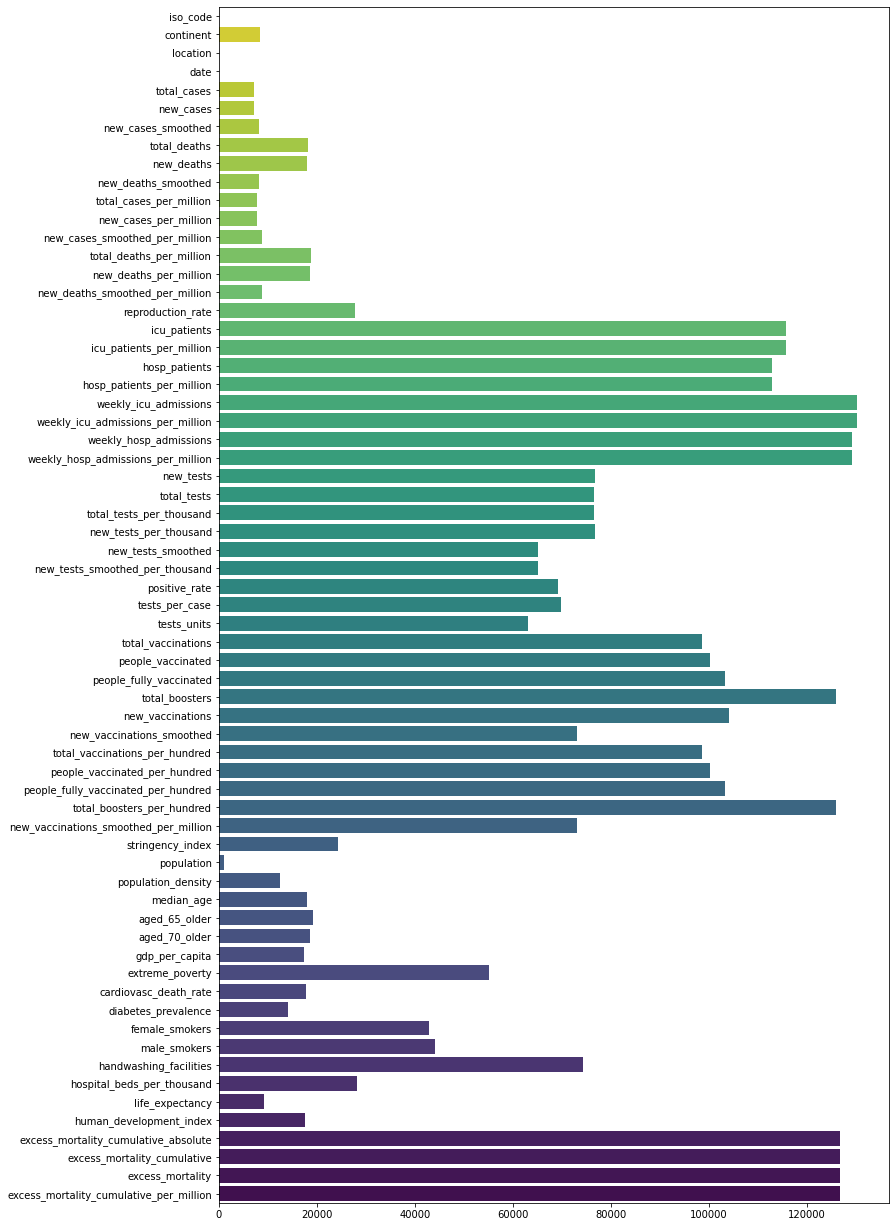

In [7]:
plt.rcParams["figure.figsize"]=12,22
palette = sns.color_palette("viridis",n_colors=65)
palette.reverse()
sns.set_palette(palette)
sns.barplot(y=df_original.columns,x=df_original.isna().sum())

In [8]:
## Choose some columns to analyse later.
df = df_original[['continent','location','date','total_cases','new_cases','hosp_patients',\
                'new_deaths','population','new_tests','median_age','total_vaccinations','icu_patients']]
del df_original ## To empty the memory


In [9]:
df.describe()


,total_cases,new_cases,hosp_patients,new_deaths,population,new_tests,median_age,total_vaccinations,icu_patients
count,1.243750e+05,124373.000000,18489.000000,113494.000000,1.305650e+05,5.481100e+04,113490.000000,3.276800e+04,15770.000000
mean,2.013939e+06,8340.909184,4014.379685,184.387148,1.584128e+08,5.670424e+04,30.501934,1.049786e+08,894.382942
std,1.150869e+07,43514.580646,11203.298286,873.054722,7.314010e+08,1.953517e+05,9.116176,4.941968e+08,2819.621475
min,1.000000e+00,0.000000,0.000000,0.000000,4.700000e+01,1.000000e+00,15.100000,0.000000e+00,0.000000
25%,2.347000e+03,3.000000,105.000000,0.000000,2.078723e+06,2.105000e+03,22.200000,3.501432e+05,25.000000
50%,2.652900e+04,104.000000,522.000000,2.000000,9.749625e+06,7.688000e+03,29.700000,2.650939e+06,127.000000
75%,2.598825e+05,1073.000000,2432.000000,22.000000,3.734479e+07,2.969550e+04,39.100000,1.596739e+07,533.000000
max,2.495419e+08,907963.000000,133268.000000,18007.000000,7.874966e+09,3.740296e+06,48.200000,7.247579e+09,28891.000000


In [10]:
df['date']=pd.to_datetime(df['date'])
df['new_cases'].fillna(0,inplace=True)
df['new_tests'].fillna(0,inplace=True)
df['new_deaths'].fillna(0,inplace=True)

In [11]:
def normalize(pdserie):
    return pdserie/pdserie.max()

Overall, how many cases does each country and continent have?

In [12]:
latest_date = max(df['date'])

In [13]:
latest_date

Timestamp('2021-11-06 00:00:00')

In [14]:
per_continent = df[['continent','total_cases','date']].copy()

In [15]:
total_cases_per_continent=per_continent[per_continent['date']==latest_date]

In [16]:
tcpcg = total_cases_per_continent.groupby('continent').apply(max)

Text(0.5, 1.0, 'Raw cases for each continent')

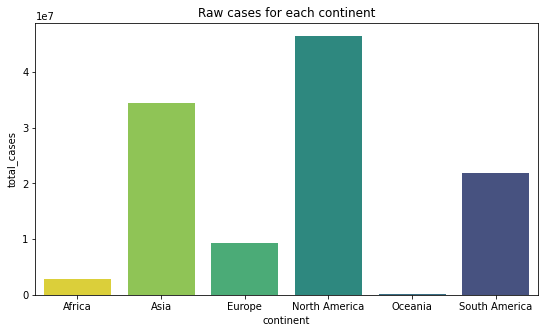

In [17]:
plt.rcParams["figure.figsize"]=9,5
sns.barplot(x = tcpcg.index,y=tcpcg['total_cases'],palette=[palette[i*10] for i in range(6)]).set_title('Raw cases for each continent')

In [18]:
pop=df[['continent','population']].groupby('continent').apply(np.mean)

In [19]:
population = {'Africa':pop['population'][0],
              'Asia':pop['population'][1],
              'Europe':pop['population'][2],
              'North America':pop['population'][3],
              'Oceania':pop['population'][4],
              'South America':pop['population'][5]}

In [20]:
population

{'Africa': 25707974.01124804,
 'Asia': 100228773.76700269,
 'Europe': 15911499.572173681,
 'North America': 23206184.746922847,
 'Oceania': 4267675.237299035,
 'South America': 36195819.06369681}

In [21]:
list(population.values())

[25707974.01124804,
 100228773.76700269,
 15911499.572173681,
 23206184.746922847,
 4267675.237299035,
 36195819.06369681]

Text(0.5, 1.0, 'Raw cases for each continent divided by population')

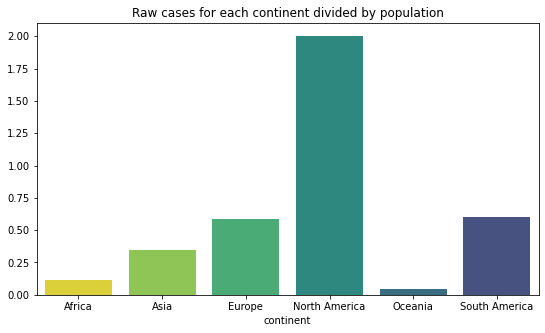

In [22]:
plt.rcParams["figure.figsize"]=9,5
sns.barplot(x = tcpcg.index,y=np.array(tcpcg['total_cases'])/list(population.values()),palette=[palette[i*10] for i in range(6)]).set_title('Raw cases for each continent divided by population')

<AxesSubplot:xlabel='total_cases', ylabel='location'>

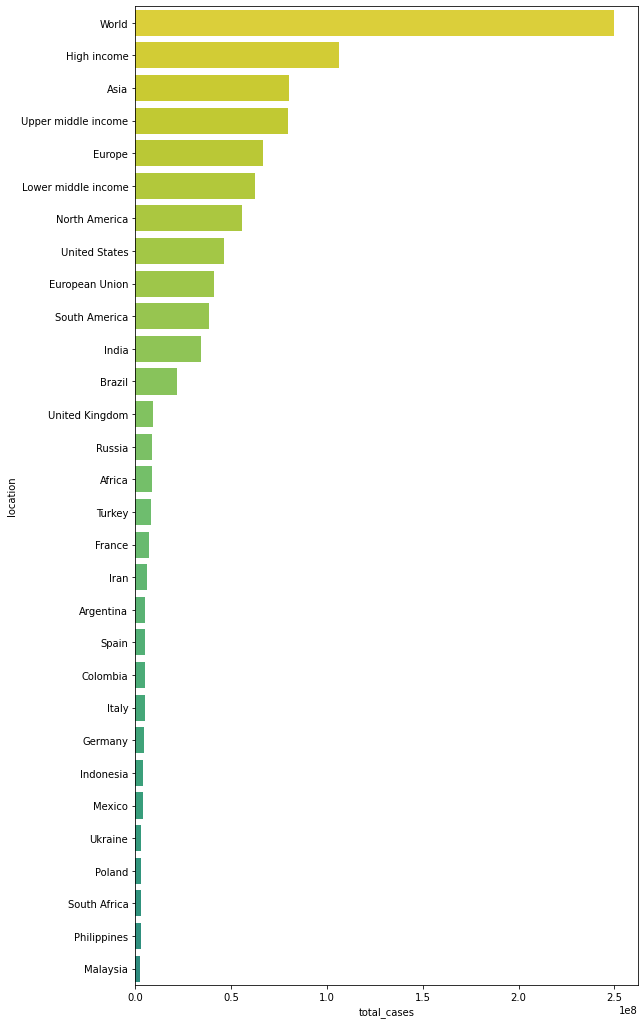

In [23]:
per_country = df[['location','total_cases','date']]
total_cases_per_country=per_country[per_country['date']==latest_date]
tcpc = total_cases_per_country.groupby('location').apply(max)

plt.rcParams["figure.figsize"]=9,18
tcpc.sort_values(by='total_cases',axis=0,ascending=False,inplace=True)
sns.barplot(y = tcpc.index[:30],x=tcpc['total_cases'][:30])

In [24]:
pop=df[['location','population']].groupby('location').apply(np.mean)

In [25]:
len(tcpc['total_cases'])
len(pop['population'])

237

In [26]:
tcpc.reset_index(inplace=True,drop=True)
tcpc.sort_values(by='location',inplace=True)
pop.sort_values(by='location',inplace=True)


In [27]:
tcpc = tcpc.join(pop,on='location',how='left',sort=True)
tcpc['loc/pop']=tcpc['total_cases']/tcpc['population']

In [28]:
tcpc.sort_values(by='loc/pop',ascending=False,inplace=True)

Text(0.5, 1.0, 'new_cases_per_population')

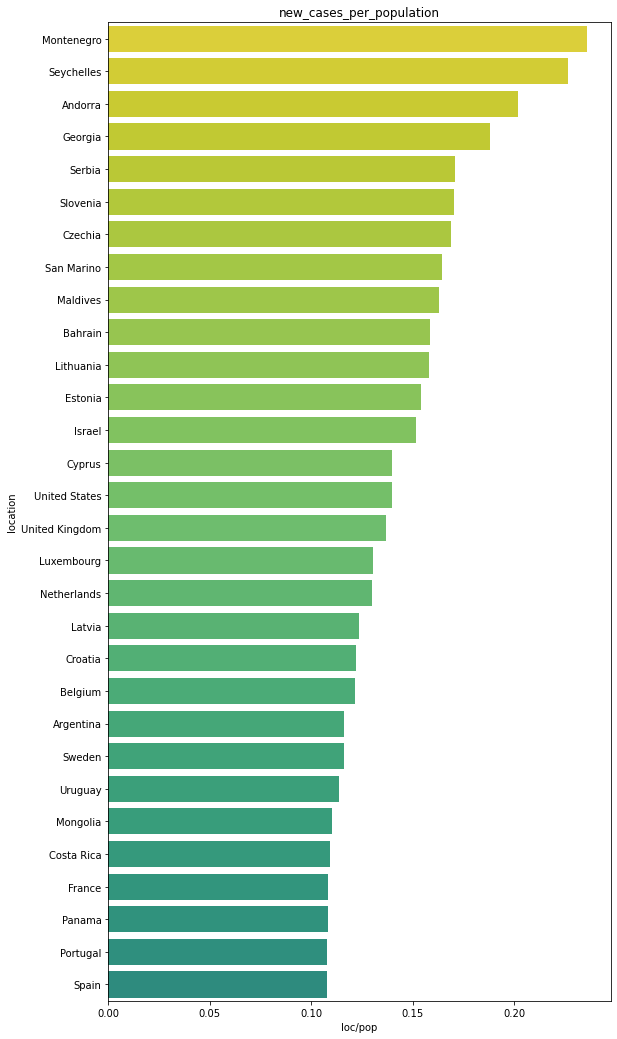

In [29]:
plt.rcParams["figure.figsize"]=9,18
sns.barplot(data = tcpc[:30],y = 'location',x = 'loc/pop').set_title('new_cases_per_population')

## Time series

In [30]:
df['year-month'] = [str(t.year)+'-'+str(t.month) for t in df['date']]

In [31]:
day_by_day_new_cases = df[['date','new_cases']].groupby('date').apply(sum)
day_by_day_new_deaths = df[['date','new_deaths']].groupby('date').apply(sum)


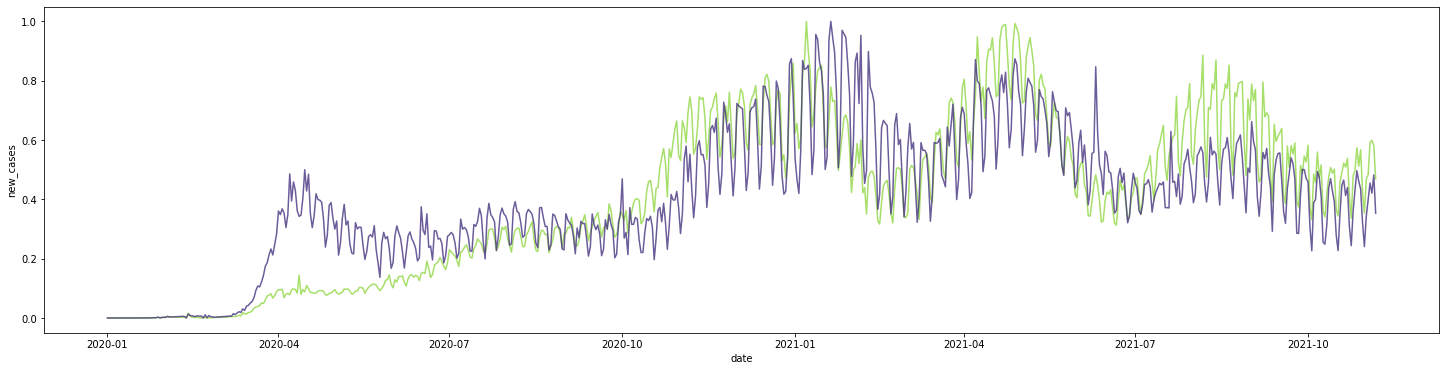

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

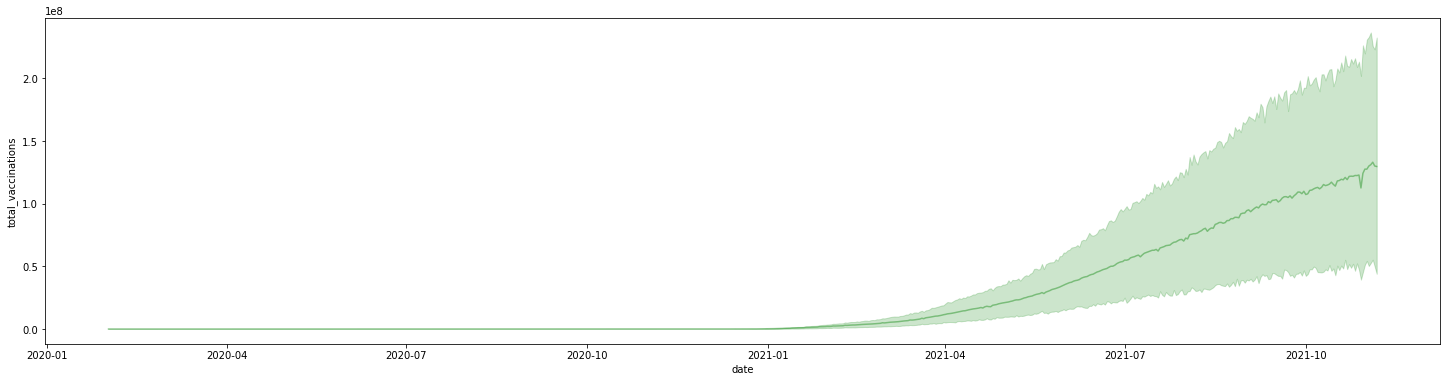

In [32]:
plt.rcParams["figure.figsize"]=25,6

day_by_day_new_cases['new_cases'] = day_by_day_new_cases['new_cases']/day_by_day_new_cases['new_cases'].max()
day_by_day_new_deaths['new_deaths'] = day_by_day_new_deaths['new_deaths']/day_by_day_new_deaths['new_deaths'].max()
sns.lineplot(x=day_by_day_new_cases.index,y=day_by_day_new_cases['new_cases'],color=palette[10],alpha = 0.8)
sns.lineplot(x=day_by_day_new_cases.index,y=day_by_day_new_deaths['new_deaths'],color=palette[55],alpha = 0.8)
plt.show()

c = df[df['year-month']!="2020-1"]
c['total_vaccinations'].fillna(0,inplace=True)
sns.lineplot(x=c['date'],y=c['total_vaccinations'],color = 'green',alpha = 0.4)


In [33]:
sns.lineplot(df['date'],df['icu_patients'],label = 'icu patients',color = palette[15])
sns.lineplot(df['date'],df['hosp_patients'],label = 'hospital patients',color = palette[55])

## Compare new cases and deaths of each month in 2021 with 2020

In [ ]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['month-day'] = df['day'].astype(str) +"-"+ df['month'].astype(str)


df_2020 = df[df['year']==2020].copy()
df_2021 = df[df['year']==2021].copy()

In [ ]:
x = df[['month','year','new_cases','new_deaths']].groupby(['month','year']).sum()

In [ ]:
dd = pd.DataFrame({'month':[i[0] for i in x.index],
                    'year':[i[1] for i in x.index],
                    'new_cases':x['new_cases']/x['new_cases'].max(),
                    'new_deaths':x['new_deaths']/x['new_deaths'].max()
                    },index=None)

<AxesSubplot:xlabel='month', ylabel='new_cases'>

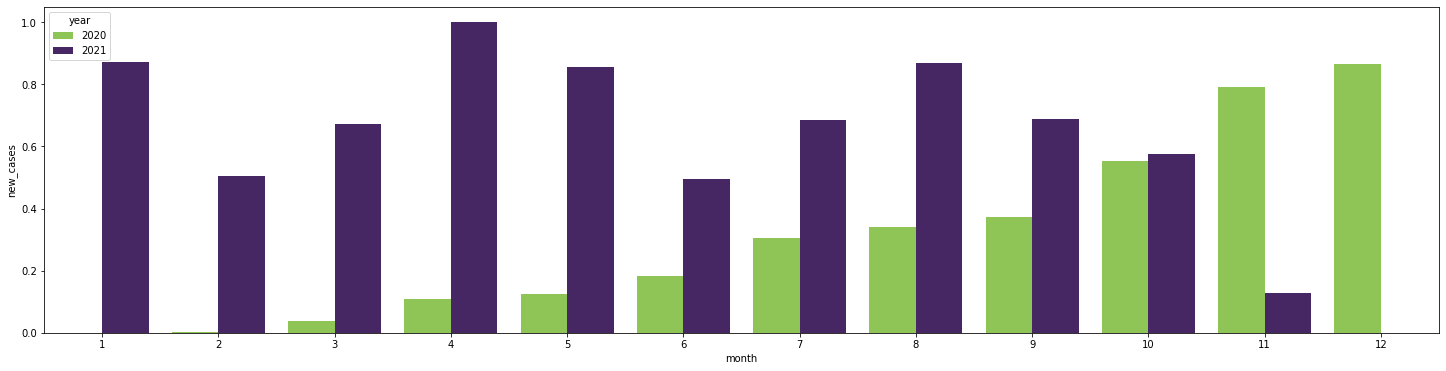

In [ ]:
plt.rcParams["figure.figsize"]=25,6
sns.barplot(data = dd, hue = 'year',x = 'month', y = 'new_cases',palette=[palette[10],palette[60]])

<AxesSubplot:xlabel='month', ylabel='new_deaths'>

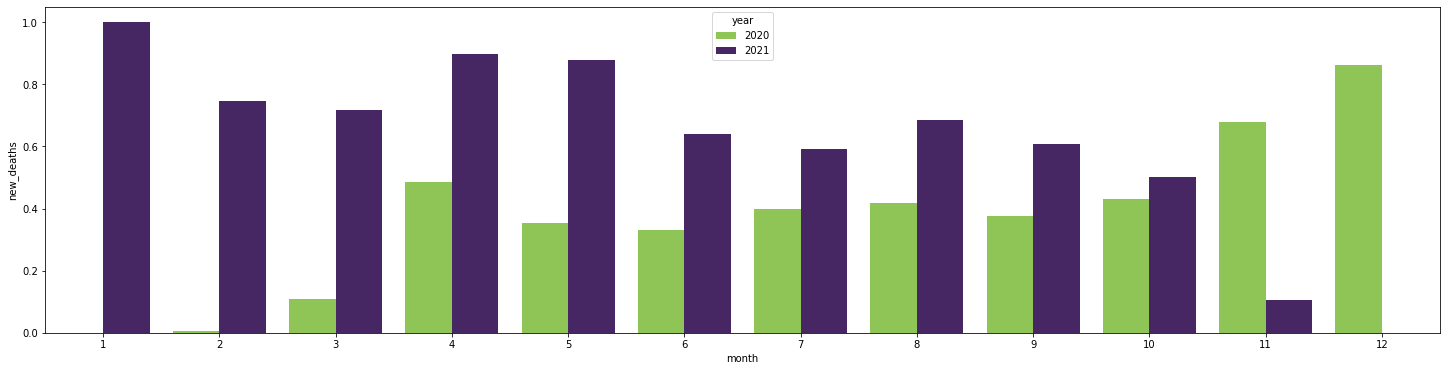

In [ ]:
sns.barplot(data = dd, hue = 'year',x = 'month', y = 'new_deaths',palette=[palette[10],palette[60]])

## Checking out some correlations

In [ ]:
nt_normal = normalize(df['new_tests'])
nc_normal = normalize(df['new_cases'])
nd_normal = normalize(df['new_deaths'])

Text(0, 0.5, 'new cases vs new deaths vs new tests')

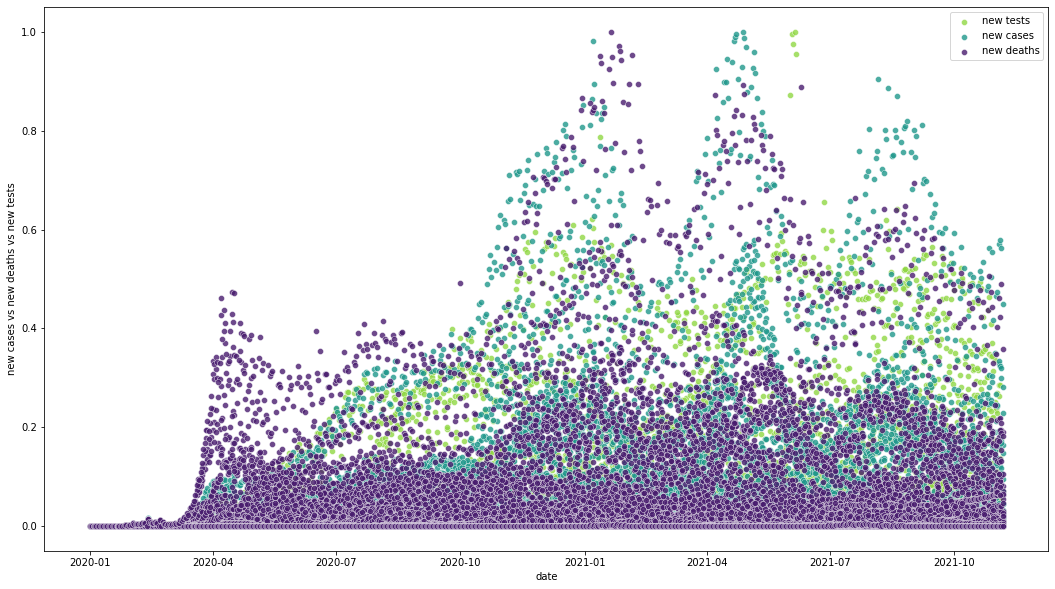

In [ ]:
plt.rcParams["figure.figsize"]=18,10

sns.scatterplot(data=df, x='date',y= nt_normal ,color = palette[10], alpha = 0.8, label='new tests')
sns.scatterplot(data=df, x='date',y= nc_normal ,color = palette[30], alpha = 0.8, label='new cases')
sns.scatterplot(data=df, x='date',y= nd_normal ,color = palette[60], alpha = 0.8, label='new deaths')
plt.ylabel('new cases vs new deaths vs new tests')

<AxesSubplot:xlabel='date', ylabel='new_cases'>

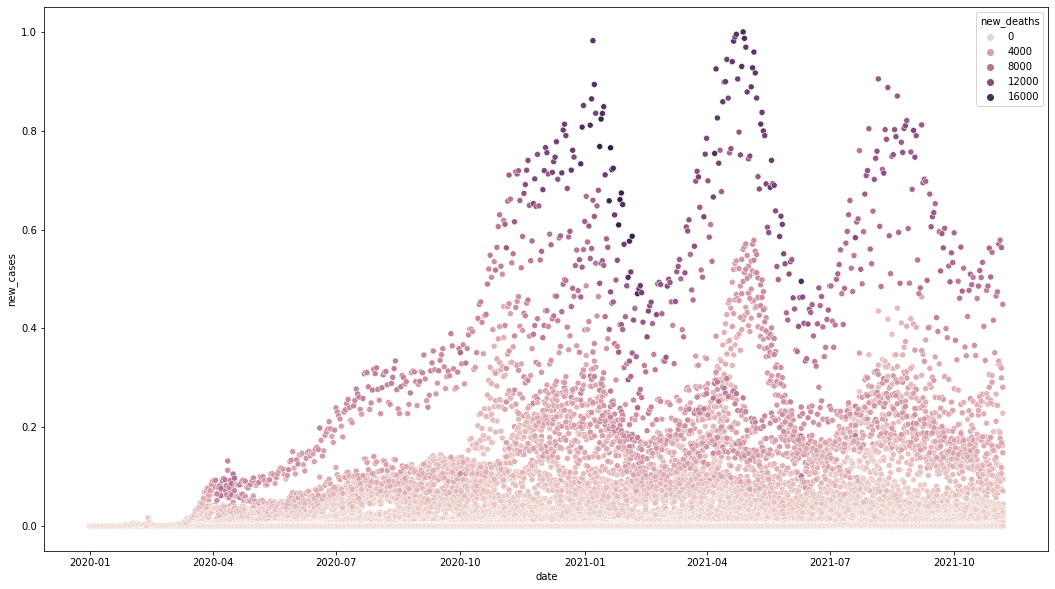

In [ ]:
sns.scatterplot(data=df, x='date',y= nc_normal ,hue = 'new_deaths')

<AxesSubplot:xlabel='date', ylabel='new_cases'>

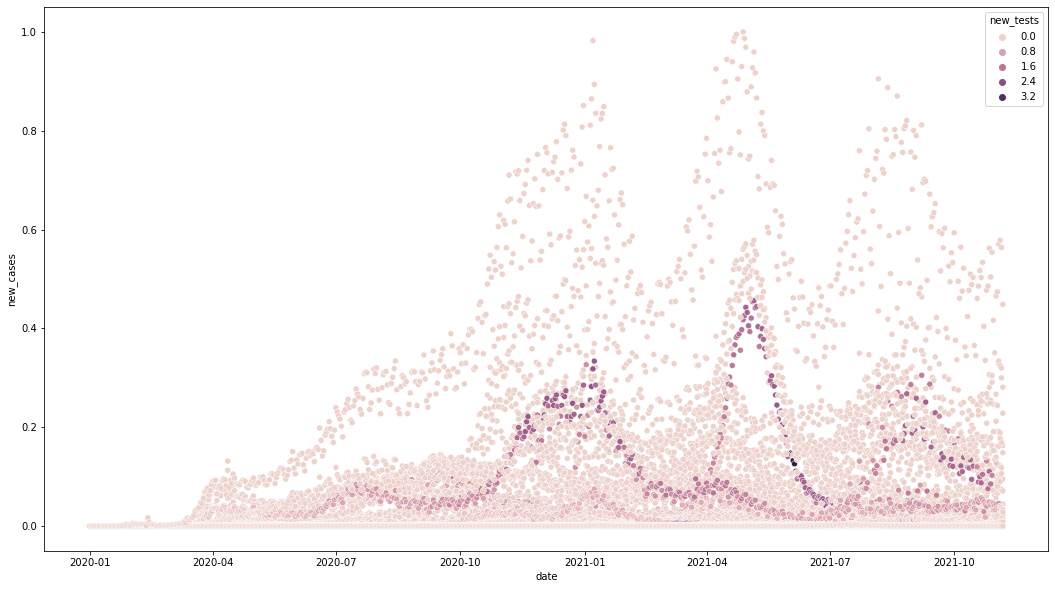

In [ ]:
sns.scatterplot(data=df, x='date',y= nc_normal ,hue = 'new_tests')